___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://i0.wp.com/why-change.com/wp-content/uploads/2021/11/Decision-Tree-elements-2.png?resize=715%2C450&ssl=1" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://i0.wp.com/why-change.com/wp-content/uploads/2021/11/Decision-Tree-elements-2.png?resize=715%2C450&ssl=1</p>

### <font color= #2E9AFE> Tema: Modelos basados en Árboles</font>

Un árbol de decisión es un conjunto de sentencias de la forma: si... entonces...

Estas sentencias dividen los datos en una serie de predictores. 

Estas divisiones de predictores son usadas para estimar la salida del modelo. 

**Ejemplo:** En un problema con dos predictores 'A' y 'B', un conjunto de sentencias de la forma:

Si el predictor 'A' >= 1.7, entonces
- Si el predictor B >=200, entonces la predicción = 1.3
- De otra forma, la predicción = 2.5

Estas sentencias están partiendo los predictores en 3 segmentos donde salidas específicas son definidas. 

**Estructura del árbol**

Toma 3 cosas en cuenta:
- Las variables predictoras (X) que se van a usar y el punto de partición del dataset.
- La profundidad/complejidad del árbol
- La ecuación de predicción en los últimos nodos/hojas del árbol

**Hiperparámetros a ajustar**
- Profundidad del árbol (max_depth)
- Número mínimo de observaciones en cada split(min_samples_split)

**Desventajas**

- Inestabilidad del modelo: Debido a que las particiones se basan en un conjunto de datos, si se generan cambios en el conjunto de datos, esto genera cambios importantes en la estructura del árbol y especialmente en su interpretabilidad.

- Rendimiento predictivo subóptimo. Nuevamente, debido a que las particiones se basan en un conjunto de datos específico, el modelo generalmente no converge con el modelo óptimo global.

**Ventajas**

- Son modelos interpretables
- Manejan bien tanto variables numéricas como categóricas
- Cada árbol individual se puede ver visualmente

In [2]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visualization
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import root_mean_squared_error 

In [4]:
# Generar datos -->
# es un ejemplo donde vamos a observar información sobre casas de una inmobiliaria para predecir el precio de renta
np.random.seed(42)
n_samples = 200
square_footage = np.random.uniform(800, 4000, n_samples) 
num_rooms = np.random.randint(2, 7, n_samples)
distance_to_city = np.random.uniform(0.5, 30, n_samples)

# Variable del precio (no lineal)  y tiene ruido
price = (square_footage * 200) + (num_rooms * 5000) - (distance_to_city * 1500)
price += np.random.normal(0, 20000, n_samples)

data = pd.DataFrame({
    'Square Footage': square_footage,
    'Number of Rooms': num_rooms,
    'Distance to City (Miles)': distance_to_city,
    'Price': price
})


In [6]:
#Ver datos
data.head()



,Square Footage,Number of Rooms,Distance to City (Miles),Price
0,1998.528380,5,28.855122,357757.823360
1,3842.285781,4,27.207844,706860.746641
2,3142.380614,2,6.275838,623674.228356
3,2715.707149,5,2.546158,578673.037438
4,1299.259649,5,3.472951,309689.644364


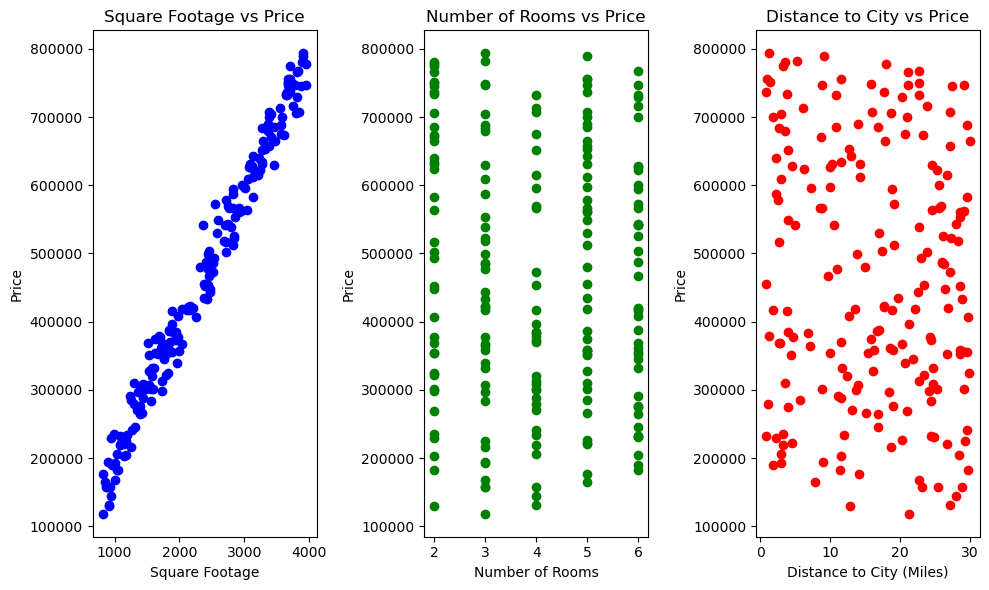

In [8]:
#Observar datos
plt.figure(figsize=(10, 6))

# Tamaño vs precio
plt.subplot(1, 3, 1)
plt.scatter(data['Square Footage'], data['Price'], color='blue')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Square Footage vs Price')

# Numero de cuartos vs precio
plt.subplot(1, 3, 2)
plt.scatter(data['Number of Rooms'], data['Price'], color='green')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Number of Rooms vs Price')

# Distancia ciudad vs precio
plt.subplot(1, 3, 3)
plt.scatter(data['Distance to City (Miles)'], data['Price'], color='red')
plt.xlabel('Distance to City (Miles)')
plt.ylabel('Price')
plt.title('Distance to City vs Price')

plt.tight_layout()
plt.show()

In [10]:
#Separar variables dependientes e independientes
TargetVariable='Price'
Predictors=['Square Footage','Number of Rooms','Distance to City (Miles)']
X=data[Predictors].values
y=data[TargetVariable].values

In [12]:
#dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
#Inicializar el modelo
model = DecisionTreeRegressor(random_state = 0)
# entrenar el modelo 
model.fit(x_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [16]:
# Prediciendo en los datos de entrenamiento y prueba 
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [18]:
# calcular el error cuadrático medio
mse = float(format(root_mean_squared_error(y_test, y_test_pred), '.3f'))
print("\nMSE: ", mse)

mse_train = float(format(root_mean_squared_error(y_train, y_train_pred), '.3f'))
print("\nMSE: ", mse_train)


MSE:  29849.282

MSE:  0.0


In [20]:
#calcular la r2 en el test
r2 = r2_score(y_test, y_test_pred)
print("\nR2: ", r2)

r2_train = r2_score(y_train, y_train_pred)
print("\nR2: ", r2_train)


R2:  0.9742046113693213

R2:  1.0


[Text(0.5211447010869565, 0.9615384615384616, 'x[0] <= 2537.684\nsquared_error = 35421501127.544\nsamples = 160\nvalue = 464315.735'),
 Text(0.29177989130434784, 0.8846153846153846, 'x[0] <= 1495.115\nsquared_error = 10379155948.205\nsamples = 93\nvalue = 326253.056'),
 Text(0.4064622961956522, 0.9230769230769231, 'True  '),
 Text(0.14639945652173914, 0.8076923076923077, 'x[0] <= 1186.612\nsquared_error = 3134824395.722\nsamples = 38\nvalue = 225776.817'),
 Text(0.08355978260869565, 0.7307692307692307, 'x[0] <= 937.604\nsquared_error = 1310535897.663\nsamples = 22\nvalue = 185812.766'),
 Text(0.025815217391304348, 0.6538461538461539, 'x[2] <= 10.883\nsquared_error = 516011739.657\nsamples = 8\nvalue = 151605.151'),
 Text(0.010869565217391304, 0.5769230769230769, 'x[0] <= 876.827\nsquared_error = 210482320.341\nsamples = 2\nvalue = 179985.759'),
 Text(0.005434782608695652, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 165477.751'),
 Text(0.016304347826086956, 0.5, 'squared_error = 0.0

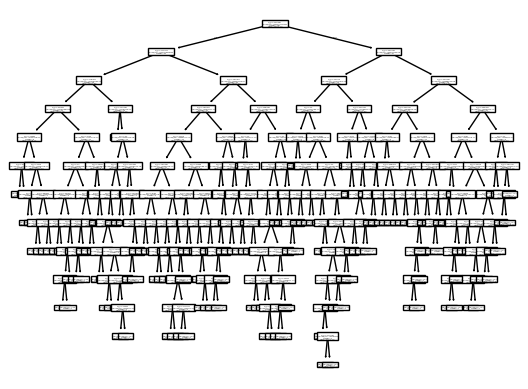

In [22]:
#visualizar el árbol
from sklearn import tree
tree.plot_tree(model) 

Pareciera que el árbol está sobre-ajustando.. observemos

In [24]:
print(model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


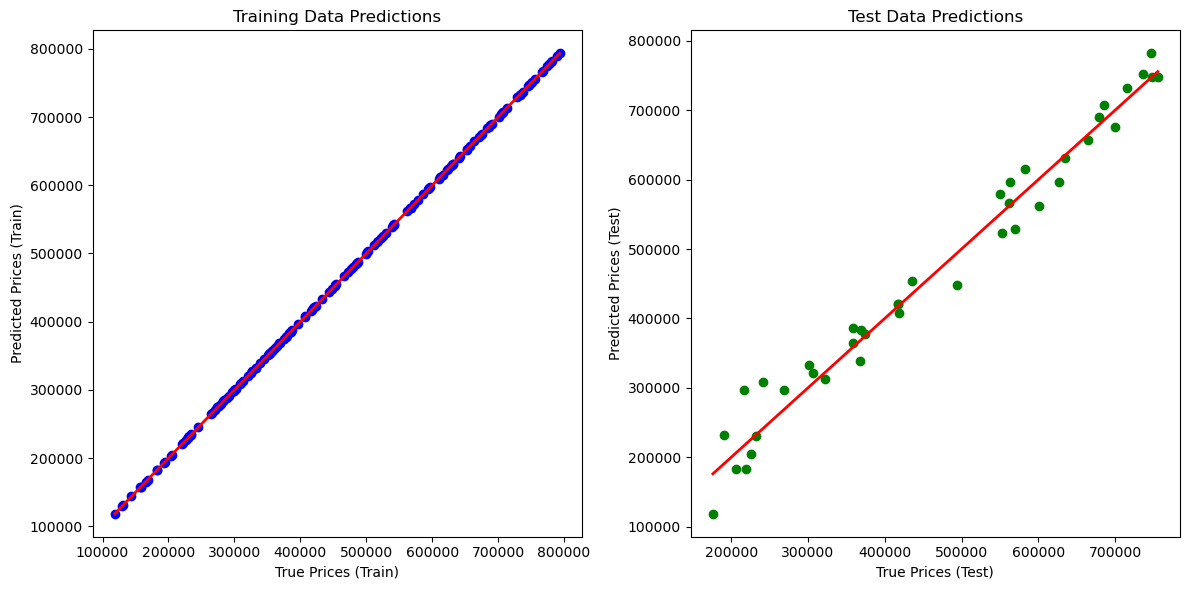

Training R^2: 1.000
Testing R^2: 0.974


In [25]:
# Grafiquemos para ver si está sobreajustando
plt.figure(figsize=(12, 6))

# Datos entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color="blue")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", lw=2)
plt.xlabel("True Prices (Train)")
plt.ylabel("Predicted Prices (Train)")
plt.title("Training Data Predictions")

# Datos de test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)
plt.xlabel("True Prices (Test)")
plt.ylabel("Predicted Prices (Test)")
plt.title("Test Data Predictions")

plt.tight_layout()
plt.show()

# Imprimimos la R2 de entrenamiento y prueba
print(f"Training R^2: {model.score(x_train, y_train):.3f}")
print(f"Testing R^2: {model.score(x_test, y_test):.3f}")

Confirmamos que el árbol está sobreajustando.... no bueno...

Un gráfico que nos puede ayudar a darnos una idea sobre qué hiperparámetros podemos utilizar es graficar cada uno de los hiperparámetros probando con diferentes valores y observamos cómo van cambiando las métricas de performance

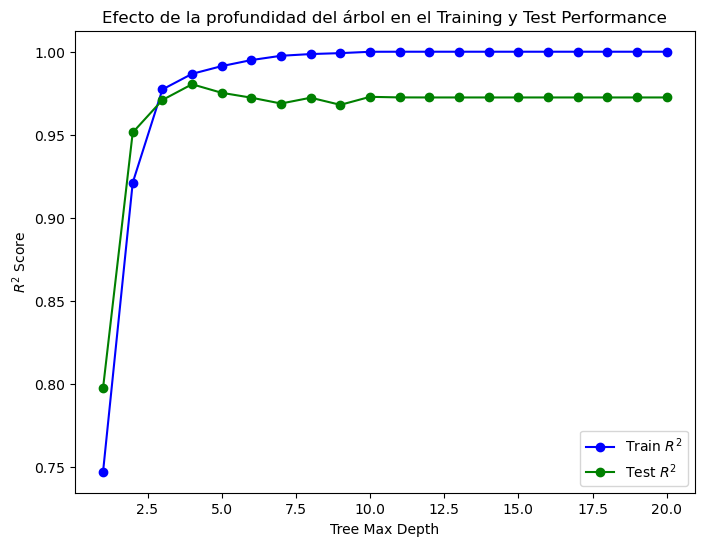

In [27]:
#graficamos la profundidad vs la R2
max_depths = range(1, 21)
train_scores = []
test_scores = []

for max_depth in max_depths:
    tree_reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_reg.fit(x_train, y_train)
    train_scores.append(tree_reg.score(x_train, y_train))
    test_scores.append(tree_reg.score(x_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(max_depths, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del árbol en el Training y Test Performance')
plt.legend()
plt.show()


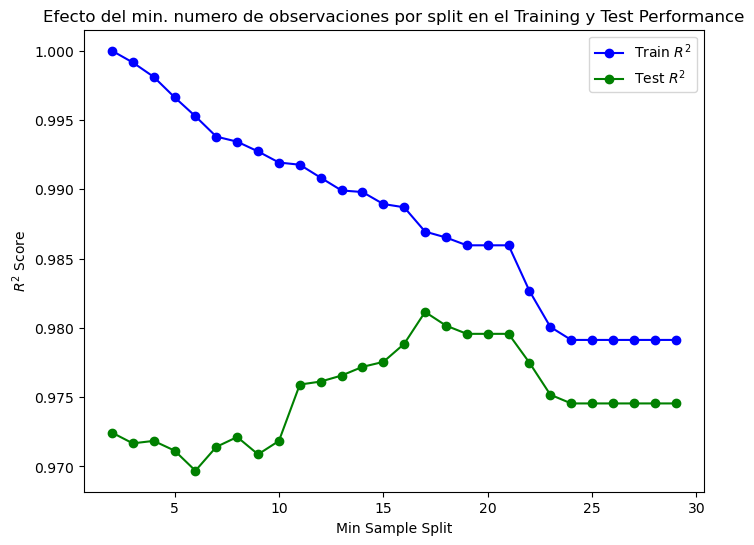

In [28]:
#graficamos el min_sample_split vs la R2
min_samples_splits = range(2, 30)
train_scores = []
test_scores = []

for min_samples_split in min_samples_splits:
    tree_reg = DecisionTreeRegressor(min_samples_split=min_samples_split, random_state=42)
    tree_reg.fit(x_train, y_train)
    train_scores.append(tree_reg.score(x_train, y_train))
    test_scores.append(tree_reg.score(x_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(min_samples_splits, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del min. numero de observaciones por split en el Training y Test Performance')
plt.legend()
plt.show()

### Grid Search

In [30]:
from sklearn.model_selection import GridSearchCV
# Definimos la malla con los valores respectivos de cada hiperparámetro a probar
param_grid = {
    'max_depth': [2, 3, 5],
    'min_samples_split': [19,20]
}

# Inicializamos el modelo
tree_reg = DecisionTreeRegressor(random_state=42)

# Inicializamos GridSearchCV con 5-fold cross-validation
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Entrenamos el modelo con los datos de entrenamiento
grid_search.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_split': [19, 20]},
             scoring='r2')

In [31]:
# Imprimir los mejores hiperparametros y el mejor score
print(f"Mejores hiperparametros: {grid_search.best_params_}")
print(f"Mejor score de R^2 con Cross-Validation: {grid_search.best_score_:.3f}")



Mejores hiperparametros: {'max_depth': 5, 'min_samples_split': 20}
Mejor score de R^2 con Cross-Validation: 0.962


In [32]:
# Evaluar el mejor modelo en el set de entrenamiento y prueba
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(x_train)
y_test_pred =best_model.predict(x_test)


# Test R^2 score
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R^2 Score: {test_r2:.3f}")

# Train R^2 score
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R^2 Score: {test_r2:.3f}")

Test R^2 Score: 0.980
Train R^2 Score: 0.980


In [33]:

# Test rmse score
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(f"Test rmse Score: {test_rmse:.3f}")

# Train rmse score
train_rmse = root_mean_squared_error(y_train, y_train_pred)
print(f"Train rmse Score: {train_rmse:.3f}")

Test rmse Score: 26563.162
Train rmse Score: 22300.670


[Text(0.5125, 0.9166666666666666, 'Square Footage <= 2537.684\nsquared_error = 35421501127.544\nsamples = 160\nvalue = 464315.735'),
 Text(0.275, 0.75, 'Square Footage <= 1495.115\nsquared_error = 10379155948.205\nsamples = 93\nvalue = 326253.056'),
 Text(0.39375, 0.8333333333333333, 'True  '),
 Text(0.15, 0.5833333333333334, 'Square Footage <= 1186.612\nsquared_error = 3134824395.722\nsamples = 38\nvalue = 225776.817'),
 Text(0.1, 0.4166666666666667, 'Square Footage <= 937.604\nsquared_error = 1310535897.663\nsamples = 22\nvalue = 185812.766'),
 Text(0.05, 0.25, 'squared_error = 516011739.657\nsamples = 8\nvalue = 151605.151'),
 Text(0.15, 0.25, 'squared_error = 713792979.043\nsamples = 14\nvalue = 205359.974'),
 Text(0.2, 0.4166666666666667, 'squared_error = 427608560.262\nsamples = 16\nvalue = 280727.387'),
 Text(0.4, 0.5833333333333334, 'Square Footage <= 2055.877\nsquared_error = 3590146218.237\nsamples = 55\nvalue = 395673.003'),
 Text(0.3, 0.4166666666666667, 'Square Footage <= 

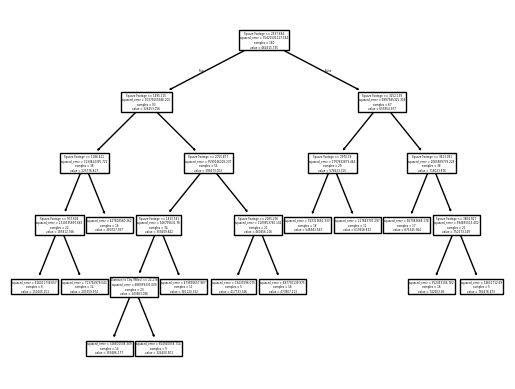

In [37]:
#visualizar el árbol
from sklearn import tree
tree.plot_tree(
decision_tree=best_model,
feature_names=data.columns,
)

In [40]:
print(
     tree.export_text(
         decision_tree=best_model,
         feature_names=data.drop(columns=['Price']).columns,
     )
 )

|--- Square Footage <= 2537.68
|   |--- Square Footage <= 1495.12
|   |   |--- Square Footage <= 1186.61
|   |   |   |--- Square Footage <= 937.60
|   |   |   |   |--- value: [151605.15]
|   |   |   |--- Square Footage >  937.60
|   |   |   |   |--- value: [205359.97]
|   |   |--- Square Footage >  1186.61
|   |   |   |--- value: [280727.39]
|   |--- Square Footage >  1495.12
|   |   |--- Square Footage <= 2055.88
|   |   |   |--- Square Footage <= 1833.54
|   |   |   |   |--- Distance to City (Miles) <= 22.28
|   |   |   |   |   |--- value: [355686.18]
|   |   |   |   |--- Distance to City (Miles) >  22.28
|   |   |   |   |   |--- value: [324500.50]
|   |   |   |--- Square Footage >  1833.54
|   |   |   |   |--- value: [381120.33]
|   |   |--- Square Footage >  2055.88
|   |   |   |--- Square Footage <= 2285.26
|   |   |   |   |--- value: [417733.35]
|   |   |   |--- Square Footage >  2285.26
|   |   |   |   |--- value: [473807.11]
|--- Square Footage >  2537.68
|   |--- Square Footag

**Ventajas de los árboles de decisión**

- No requiere escalamiento de variables
- Puede  ser usado para datos no lineales
- Fácil de visualizar
- Fácil de interpretar

**Desventajas de los árboles de decisión**

- Es computancionalmente complejo, especialmente al usar cross-validation para ajustar los hiperparámetros
- Un cambio pequeño en los datos puede causar grandes cambios en la estructura del árbol